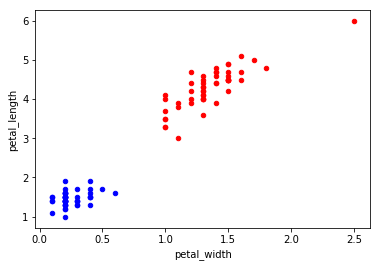

<Figure size 432x288 with 0 Axes>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import pandas as pd
#matplotlibをベースにpythonの可視化を行ってくれるライブラリ
import seaborn as sns

from sklearn import datasets

"""
sepal length	ガクの長さ
sepal width	ガクの幅
petal length	花弁の長さ
petal width	花弁の幅

"""
iris = sns.load_dataset('iris')
n_samples = 100

#100までのirisを取り出す
data = iris[:n_samples + 1]
columns = ['petal_width', 'petal_length']

x = data[columns]
y = data['species']

#astypeでintにキャスト、勝手に数値化？
y = (y == 'setosa').astype(int)
def plot_iris(x, y, colors, ax = None):
  if ax is None:
    fig = plt.figure()
    #1行1列1個目に表示
    ax = fig.add_subplot(1, 1, 1)
  
  plt.figure()
  x1 = x.columns[0]
  x2 = x.columns[1]
#   x.groupby(y)でyの0と1でxを分割しているzipで囲むと中で並べたものを整理してくれる感じ？
  for (species, group), c in zip(x.groupby(y), colors):
    group.plot(kind = "scatter", x = x1, y = x2, color = c, ax = ax)
  return ax

plot_iris(x, y, colors = ["red", "blue"])
plt.show()

In [3]:
# sigmoid関数の定義
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

# 重みwとxをかけてバイアスを足したものに活性化関数としてsigmoidをかけている
def calc_y(x, w, b):
  return sigmoid(np.dot(x, w) + b)

#　勾配を計算する
def calc_grad(x, y, w, b):
  # 正解のyから予想したyを引く
  error = y - calc_y(x, w, b)
  #　勾配を求める。sigmoidを使用している為差を掛け算するだけでいい
  w_grad = -np.mean(x.T * error, axis = 1)
  b_grad = -np.mean(error)
#   print("w_grad", w_grad)
  
  return w_grad, b_grad

In [5]:
# 何回繰り返すか
nb_epochs = 100

In [6]:
# 勾配降下法（確率ではない）eta=0.4で傾きがあまり進まないようにする、坂道は必ず上がらないerrorが下がる方向にしか進まない
def GradientDescent(x, y, w, b, eta = 0.4):
  for i in range(1, nb_epochs):
    w_grad, b_grad = calc_grad(x, y, w, b)
    #  etaは学習率
    w -= eta * w_grad
    b -= eta * b_grad
    # absは絶対値、どれくらい間違えたか計算しているだけ
    e = np.mean(np.abs(y - calc_y(x, w, b)))
    yield i, w, b, e

# 確率的勾配降下法
def SGD (x, y, w, b, eta = 0.4):
  for i in range(1, nb_epochs):
#     xをランダムに抽出している
    indexer = np.arange(x.shape[0])
    np.random.shuffle(indexer)
    for index in indexer:
#       該当するxを取り出す
      _x = x.iloc[[index], ]
      _y = y.iloc[[index], ]
      w_grad, b_grad = calc_grad(_x, _y, w, b)
      w -= eta * w_grad
      b -= eta * b_grad
      e = np.mean(np.abs(y - calc_y(x, w, b)))
      yield i, w, b,e
      
def MiniBatchSGD(x, y, w, b, eta = 0.4, batch_size = 16):
   for i in range(1, nb_epochs):
#     xをランダムに抽出している
    indexer = np.arange(x.shape[0])
    np.random.shuffle(indexer)
    
    for index in indexer:
      batch_x = x[index:index + batch_size]
      batch_y = y[index:index + batch_size]
      w_grad, b_grad = calc_grad(batch_x, batch_y, w, b)
      w -= eta * w_grad
      b -= eta * b_grad
      e = np.mean(np.abs(y - calc_y(x, w, b)))
      yield i, w, b,e
      

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

def plot_result(x, y, solver, title, animation_max_length=100):
    fig = plt.figure()

    ax = fig.add_subplot(1, 1, 1)
    plt.xlim([0.0, 3.0])
    plt.ylim([-1.0, 8.0])

    art_objs = []
    loss_x = []
    loss_y = []
    
    bx = np.arange(x.iloc[:, 0].min(), x.iloc[:, 0].max(), 0.1)

    w, b = np.zeros(2), 0# w,bにそれぞれnp.zeros(2), 0を代入
    gen = solver(x, y, w, b)

    for i, w, b, e in gen:
        if len(art_objs) < animation_max_length:
            by = -b / w[1] - w[0] / w[1] * bx
            l = ax.plot(bx, by, color='gray', linestyle='dashed')
            art_objs.append(l)
            
        loss_x.append(i)
        loss_y.append(e)

    ax = plot_iris(x, y, colors=['red', 'blue'], ax=ax)
    ax.set_title(title)

    anim = animation.ArtistAnimation(fig, art_objs, interval=100, repeat=True, blit=True, repeat_delay=1000)
    
    plt.plot(loss_x, loss_y)
    
    return anim

rc('animation', html='jshtml')

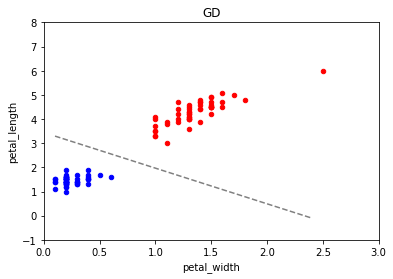

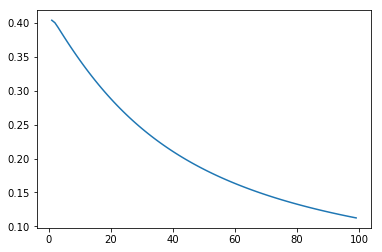

In [10]:
plot_result(x, y, GradientDescent, title = 'GD')